In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# GATHERING DATA

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ACESSING DATA

In [13]:
#NO OF ROWS
data.shape[0]

891

In [14]:
#NO OF COLUMNS
data.shape[1]

12

In [16]:
#GETTING INFORMATION WHETHER ALL THE COLUMNS ARE EQUAL OR NOT
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [21]:
#CHECKING WHETHER IS UNIQUE OR NOT
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DATA CLEANING

In [22]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# only by looking at the columns we can find that columns(passengerId,Ticket,Name) will not contribute in our analysis so we will drop those

In [31]:
data.drop(columns=['PassengerId','Name','Ticket',],inplace=True)

In [32]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [39]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Age columns has a large standard deviation from the mean value. That means it's not possible to simply fill the missing values as the mean value. So we will need a work around, that is we will generate a list of random numbers equal to the length of missing values between (mean-std) and (mean+std)

In [44]:
#TOTAL NO OF ROWS WHICH HAS MISSING VALUES IN THE AGE COLUMN
data['Age'].isnull().sum()

177

In [53]:
import random
print("TOTAL NO OF MISSING VALUES IN AGE COLUMN",data['Age'].isnull().sum())
mean = data['Age'].mean()
std = data['Age'].std()
lower_limit = round(mean-std,0)
upper_limit = round(mean+std,0)
random_list=[]
for i in range(0,177):
    random_list.append(random.randint(lower_limit,upper_limit))
random_list=np.array(random_list)
age=data['Age'].values

k=0
for i,j in enumerate(age):
    if np.isnan(age[i]):
        age[i]=random_list[k]
        k=k+1

data['Age']=age

print('NO OF MISSING VALUES IN AGE COLUMN',data['Age'].isnull().sum())

TOTAL NO OF MISSING VALUES IN AGE COLUMN 0
NO OF MISSING VALUES IN AGE COLUMN 0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


# EXPLORATORY DATA ANALYSIS

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [72]:
#EMBARKED COLUMN AS ONLY 2 MISSING VALUES
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [73]:
#AS THE MOST COMMON(TOP) IS S SO WE WILL FILL IT UP WITH S ONLY
data['Embarked'].fillna('S',inplace=True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


FOR SIMPLICITY WE WILL CONVERT THE PCLASS COLUMN INTO STRING

In [75]:
data['Pclass']=data['Pclass'].astype('object')
data['Pclass'].replace({1:"Upper Class",2:"Middle Class",3:"Lower Class"},inplace=True)

In [78]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,Lower Class,male,22.0,1,0,7.2500,S
1,1,Upper Class,female,38.0,1,0,71.2833,C
2,1,Lower Class,female,26.0,0,0,7.9250,S
3,1,Upper Class,female,35.0,1,0,53.1000,S
4,0,Lower Class,male,35.0,0,0,8.0500,S


ADDING A NEW COLUMN AS "S" TO STORE THE SURVIVED/ NOT SURVIVED AS STRING  

In [125]:
#Adding a new column 's' to store survived status as a string for better visualisations
data['s']=''
data.loc[(data['Survived']==1),'s'] = 'Survived'
data.loc[(data['Survived']==0),'s'] = 'Not Survived'

In [126]:
# Seeing the correlation in the data
print(data.corr())

          Survived       Age     SibSp     Parch      Fare
Survived  1.000000 -0.048908 -0.035322  0.081629  0.257307
Age      -0.048908  1.000000 -0.206646 -0.163132  0.098915
SibSp    -0.035322 -0.206646  1.000000  0.414838  0.159651
Parch     0.081629 -0.163132  0.414838  1.000000  0.216225
Fare      0.257307  0.098915  0.159651  0.216225  1.000000


In [133]:
data.drop(columns=['S'],inplace=True)

In [138]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 's'],
      dtype='object')

# Q1.NO OF PEOPLE ON THE BASIS OF GENDER AND CLASS ON TITANIC

In [149]:
people_on_titanic=data.groupby('Sex')
print('\n\n',people_on_titanic.size())

people_on_basis_of_class=data.groupby('Pclass')
print('\n\n',people_on_basis_of_class.size())




 Sex
female    314
male      577
dtype: int64


 Pclass
Lower Class     491
Middle Class    184
Upper Class     216
dtype: int64


# Q2.PEOPLE WHO SURVIVED?

In [151]:
people_who_survived=data.groupby('s')
len(people_who_survived)
people_who_survived.size()

s
Not Survived    549
Survived        342
dtype: int64

## Note:In Total of 891 passengers only 342 survived 

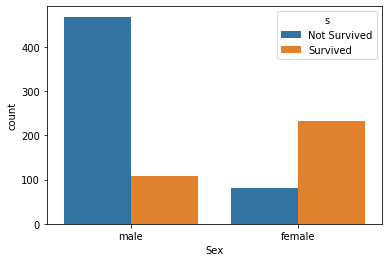

In [155]:
sns.countplot(x='Sex',hue='s',data=data)
plt.show()

In [156]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 's'],
      dtype='object')

# Q3. WHETHER THE CLASS OF A PERSON HELPED HIM/HER TO SURVIVE?

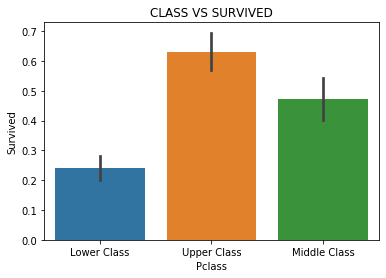

In [164]:
sns.barplot(x='Pclass',y='Survived',data=data)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('CLASS VS SURVIVED')
plt.show()

## As you can see the passenger class contributes to the passenger survival

# Q4.WHAT IS THE SURVIVAL RATE PER CLASS?

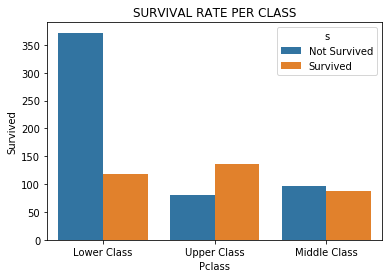

In [165]:
sns.countplot(x='Pclass',hue='s',data=data)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('SURVIVAL RATE PER CLASS')
plt.show()


## As you can see the lower class survival rate is very high

# Q5. WHAT IS THE EXACT NO OF PEOPLE WHO SURVIVED ON THE BASIS OF PASSENGER CLASS?

In [167]:
people_who_survived_on_the_basis_of_class=data.groupby(['Pclass','s'])
len(people_who_survived_on_the_basis_of_class)
people_who_survived_on_the_basis_of_class.size()

Pclass        s           
Lower Class   Not Survived    372
              Survived        119
Middle Class  Not Survived     97
              Survived         87
Upper Class   Not Survived     80
              Survived        136
dtype: int64

# Q6. WHAT IS THE EXACT NO OF MALES AND FEMALES WHO SURVIVED ON THE BASIS OF PASSENGER CLASS?

In [168]:
survival_rate_per_sex=data.groupby(['Pclass','s','Sex'])
len(survival_rate_per_sex)
survival_rate_per_sex.size()

Pclass        s             Sex   
Lower Class   Not Survived  female     72
                            male      300
              Survived      female     72
                            male       47
Middle Class  Not Survived  female      6
                            male       91
              Survived      female     70
                            male       17
Upper Class   Not Survived  female      3
                            male       77
              Survived      female     91
                            male       45
dtype: int64

## As you can see from our visualization till now, the upper class people were given more priority during survival than middle and the lower class.

 

# Q7. DOES THE SEX OF A PERSON CONTRIBUTED IN ITS SURVIVAL?

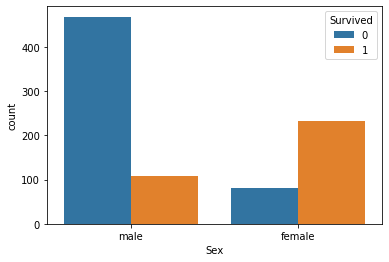

In [170]:
sns.countplot(x='Sex', hue='Survived',data=data)

 ## we can see that the females were given more priority than mens during rescue operation

# Q8. WHETHER THE SIBLINGS/PARCH HELPED A PASSENGER IN ITS RESCUE OPERATION? 

In [171]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 's'],
      dtype='object')

### for that we can merge the 'Sibsp' and 'Parch' into one column 

In [177]:
data['Relatives']=data['SibSp']+data['Parch']

In [178]:
data.corr()

,Survived,Age,SibSp,Parch,Fare,Relatives
Survived,1.000000,-0.048908,-0.035322,0.081629,0.257307,0.016639
Age,-0.048908,1.000000,-0.206646,-0.163132,0.098915,-0.222734
SibSp,-0.035322,-0.206646,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,-0.163132,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,0.098915,0.159651,0.216225,1.000000,0.217138
Relatives,0.016639,-0.222734,0.890712,0.783111,0.217138,1.000000


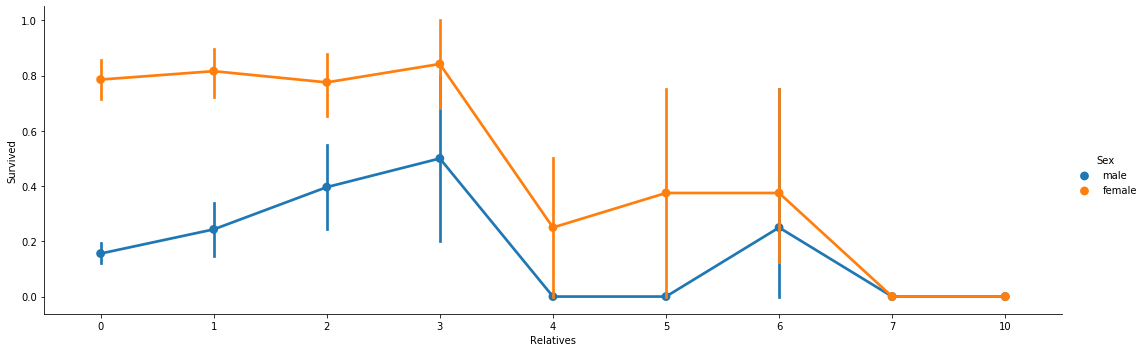

In [189]:
sns.catplot(x='Relatives',y='Survived',data=data,hue='Sex',kind='point',aspect=3)

## This shows that while there is a higher chance of survival for men between 1 to 3 relatives and lower in the case of having none, or 6 relatives. Women have a higher chance of survival having relaives between 0 to 4¶ 

# Q9.WHETHER THE AGE HELPED A PASSENGER IN ITS SURVIVAL?

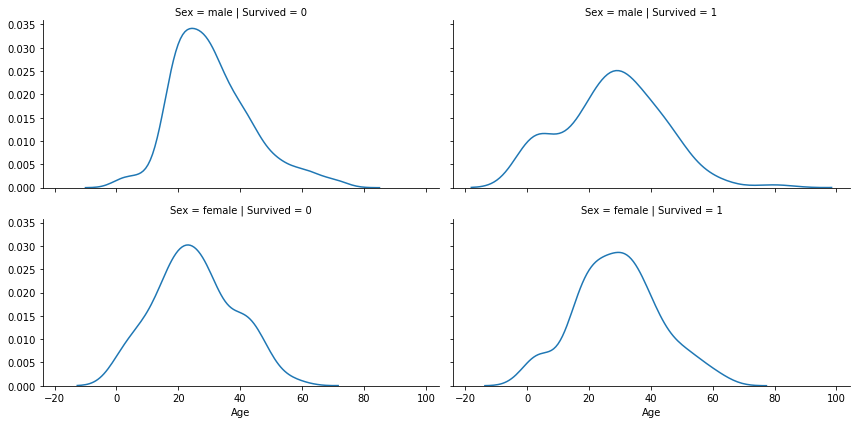

In [195]:
facet=sns.FacetGrid(row='Sex',col='Survived',data=data,aspect=2)
facet.map(sns.distplot,'Age',hist=False)
plt.show()

## As you can see that according to approximation Men had a higher chance of survival between age of 18 and 50 years old and women had a higher chance of survival between age of 15 and 50 years old. 

# CONCLUSION:

#### According to our analysis, We found that a passengers's chance of survival increases when :
      FOR MEN:
      1.BELONGS TO UPPERCLASS AND MIDDLE CLASS
      2.INFANT OR AGE BETWEEN 18 TO 50
      3.HAVING RELATIVES BETWEEN 1 TO 3
       
      FOR WOMEN:
      1.BELONGS TO ANYCLASS
      2.INFANT OR AGE BETWEEN 15 TO 50
      3.HAVING RELATIVES BETWEEN 0 TO 4


In [200]:
pd.DataFrame({
    'Sex':['Male','Female'],
    'Pclass':['Upper Class AND Middle Class','Any Class'],
    'AGE':['(0-4) or (18-50)','(0-4) or (15-50)'],
    'Relative':['(1-3)','(0-4)']
})

,Sex,Pclass,AGE,Relative
0,Male,Upper Class AND Middle Class,(0-4) or (18-50),(1-3)
1,Female,Any Class,(0-4) or (15-50),(0-4)


In [202]:
#!pip install weasyprint
#!pip install imgkit
#!pip install pdfkit